In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [95]:
filename = "case_data.csv"
filepath = f"data/{filename}"

data = pd.read_csv(filepath)
df = data[:60]
df = df.dropna(subset=['R.4', 'A.4', 'S.4'])
df.rename(columns={'Age ': 'Age'}, inplace=True)

In [96]:
df.drop(columns=['Center Point (Left)'], inplace=True)
df.drop(columns=['Center Point (Right)'], inplace=True)
df.drop(columns=['Most Anterior Point on Iliac Crest (Left)'], inplace=True)
df.drop(columns=['Most Anterior Point on Iliac Crest (Right)'], inplace=True)
df.drop(columns=['Xyphoid Process'], inplace=True)

In [97]:
df['Torso Length'] = df['S.4'] - (df['S.2'] + df['S.3']) / 2
df['Torso Width'] = df['R.1'] - df['R']
df['Left Center Point'] = list(zip(df['R'], df['A'], df['S']))
df['Right Center Point'] = list(zip(df['R.1'], df['A.1'], df['S.1']))
df['Left Illiac Crest'] = list(zip(df['R.2'], df['A.2'], df['S.2']))
df['Right Illiac Crest'] = list(zip(df['R.3'], df['A.3'], df['S.3']))
df['Xyphoid Process'] = list(zip(df['R.4'], df['A.4'], df['S.4']))

In [98]:
df.drop(columns=['R', 'A', 'S'], inplace=True)
df.drop(columns=['R.1', 'A.1', 'S.1'], inplace=True)
df.drop(columns=['R.2', 'A.2', 'S.2'], inplace=True)
df.drop(columns=['R.3', 'A.3', 'S.3'], inplace=True)
df.drop(columns=['R.4', 'A.4', 'S.4'], inplace=True)

In [99]:
include_columns = ['Case Number', 'Age', 'Gender', 'BMI', 'Torso Length', 'Torso Width', 'Left Illiac Crest', 'Right Illiac Crest', 'Xyphoid Process']

left_kidney_data = ['Left Center Point', 'LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2']
right_kidney_data = ['Right Center Point', 'LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1']

left_kidney = df[include_columns + left_kidney_data].copy()
right_kidney = df[include_columns + right_kidney_data].copy()

left_kidney.loc[:,'LR'] = left_kidney['LR2'] - left_kidney['LR1']
left_kidney.loc[:,'PA'] = left_kidney['PA2'] - left_kidney['PA1']
left_kidney.loc[:,'IS'] = left_kidney['IS2'] - left_kidney['IS1']
left_kidney.drop(columns=['LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2'], inplace=True)

right_kidney.loc[:,'LR'] = right_kidney['LR2.1'] - right_kidney['LR1.1']
right_kidney.loc[:,'PA'] = right_kidney['PA2.1'] - right_kidney['PA1.1']
right_kidney.loc[:,'IS'] = right_kidney['IS2.1'] - right_kidney['IS1.1']
right_kidney.drop(columns=['LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1'], inplace=True)

In [100]:
def calculate_distance(point1, point2):
    if pd.isna(point1) or pd.isna(point2):  # Check for NaN values
        return np.nan
    return np.sqrt((point1[0] - point2[0]) ** 2 +
                   (point1[1] - point2[1]) ** 2 +
                   (point1[2] - point2[2]) ** 2)

left_kidney['Center Distance from LIC'] = left_kidney.apply(
    lambda row: calculate_distance(row['Left Illiac Crest'], row['Left Center Point']), axis=1
)
right_kidney['Center Distance from LIC'] = right_kidney.apply(
    lambda row: calculate_distance(row['Left Illiac Crest'], row['Right Center Point']), axis=1
)

In [101]:
left_kidney

,Case Number,Age,Gender,BMI,Torso Length,Torso Width,Left Illiac Crest,Right Illiac Crest,Xyphoid Process,Left Center Point,LR,PA,IS,Center Distance from LIC
0,case_00000,49,male,29.47,266.9510,137.430,"(-126.811, 8.642, -112.065)","(132.939, 23.984, -116.837)","(-2.211, 53.167, 152.5)","(-65.897, -78.243, 52.806)",78.17,62.93,112.21,196.066227
1,case_00001,50,male,33.71,262.6500,254.099,"(-121.16, 8.642, -131.844)","(132.939, 16.92, -129.552)","(5.686, 126.479, 131.952)","(-121.16, 8.642, -131.844)",86.19,91.49,117.34,0.000000
2,case_00002,74,male,28.13,245.6135,143.556,"(-99.603, -43.905, -43.905)","(132.939, -38.321, -81.048)","(0.127, 120.438, 183.137)","(-57.666, -98.83, 66.496)",86.19,85.84,114.51,130.245339
3,case_00003,44,female,38.69,NaN,130.318,"(nan, nan, nan)","(nan, nan, nan)","(-10.406, 60.701, 125.215)","(-69.8, -49.757, -25.746)",75.14,85.85,129.23,NaN
4,case_00004,73,male,28.59,NaN,165.332,"(nan, nan, nan)","(nan, nan, nan)","(-10.406, 147.535, 115.411)","(-88.007, -39.953, -21.969)",89.15,85.85,123.62,NaN
6,case_00006,69,male,24.42,312.1270,148.366,"(-126.811, 34.065, -87.98)","(132.939, 40.988, -94.09)","(-10.406, 109.699, 221.092)","(-75.244, -49.697, 78.646)",77.48,72.90,107.65,193.492770
9,case_00009,73,female,22.90,234.2040,127.017,"(-118.982, -3.39, -112.537)","(141.253, 5.623, -113.115)","(10.856, 58.678, 121.378)","(-47.076, -47.341, 3.716)",73.15,72.73,109.78,143.585944
10,case_00010,71,female,33.13,239.6385,124.698,"(-118.982, -3.39, -117.972)","(141.253, -17.201, -118.549)","(19.55, 80.415, 121.378)","(-60.985, -39.126, -21.193)",66.49,86.96,105.74,118.350702
11,case_00011,65,female,31.47,229.1115,129.496,"(-118.982, 43.147, -42.625)","(141.253, 18.257, -31.014)","(0.315, 83.564, 192.292)","(-78.045, -19.002, 87.303)",83.57,92.71,120.12,149.731831
12,case_00012,62,female,30.92,242.0550,116.552,"(-118.982, 43.147, -46.323)","(117.527, 36.747, -53.203)","(13.256, 88.956, 192.292)","(-63.869, -19.002, 86.071)",79.87,92.71,117.66,156.294953


In [102]:
left_kidney.to_csv('leftkidney.csv', index=False)

Distance of Left Centerpoint from Left Iliac Crest (Age)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_35332/1181166558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_kidney['Age Group'] = pd.cut(left_kidney['Age'], bins=bins, labels=labels, right=False)
/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_35332/1181166558.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = left_kidney.groupby('Age Group')['Center Distance from LIC'].mean()


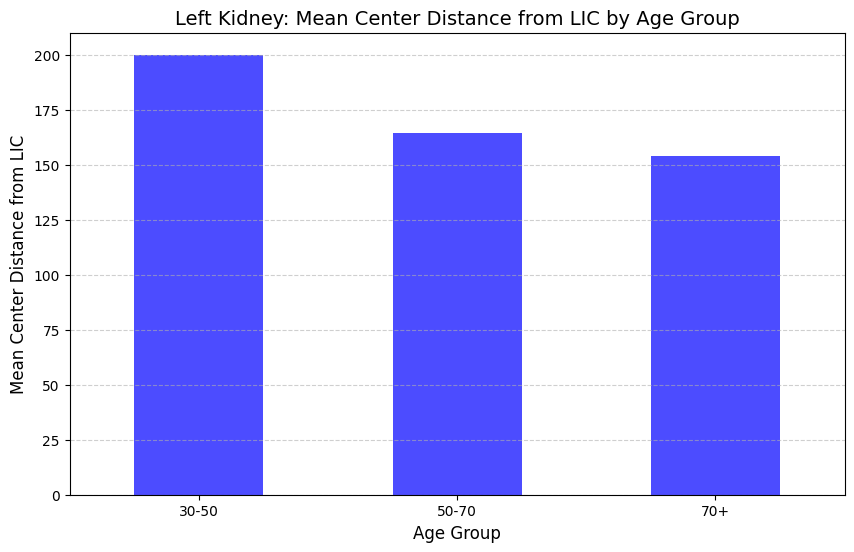

In [103]:
left_kidney = left_kidney.dropna(subset=['Age', 'Center Distance from LIC'])

bins = [30, 50, 70, 100]  # Combine 50-60 and 60-70 into 50-70
labels = ['30-50', '50-70', '70+']  # Updated labels

left_kidney['Age Group'] = pd.cut(left_kidney['Age'], bins=bins, labels=labels, right=False)

grouped_data = left_kidney.groupby('Age Group')['Center Distance from LIC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Left Kidney: Mean Center Distance from LIC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Center Distance from LIC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Right Centerpoint from Left Iliac Crest (Age)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_35332/1860216868.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = right_kidney.groupby('Age Group')['Center Distance from LIC'].mean()


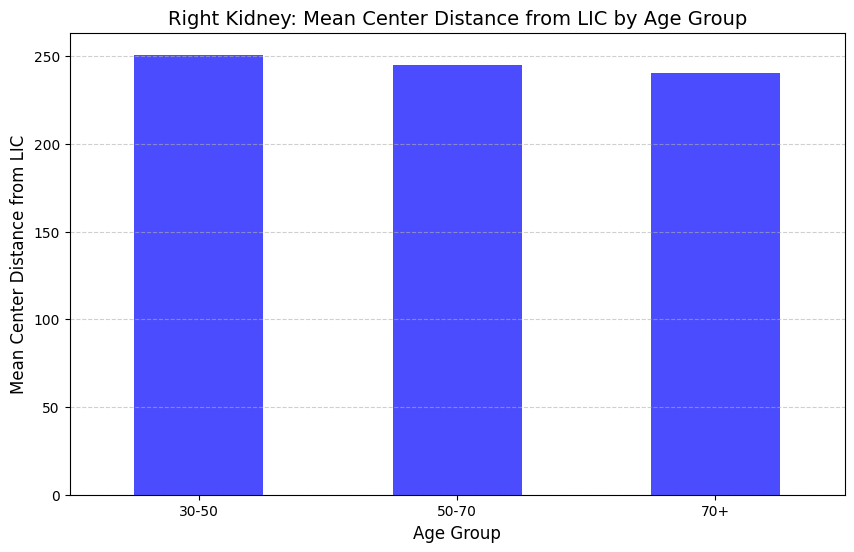

In [104]:
right_kidney = right_kidney.dropna(subset=['Age', 'Center Distance from LIC'])

bins = [30, 50, 70, 100]  # Combine 50-60 and 60-70 into 50-70
labels = ['30-50', '50-70', '70+']  # Updated labels

right_kidney['Age Group'] = pd.cut(right_kidney['Age'], bins=bins, labels=labels, right=False)

grouped_data = right_kidney.groupby('Age Group')['Center Distance from LIC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Right Kidney: Mean Center Distance from LIC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Center Distance from LIC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Left Centerpoint from Left Iliac Crest (Gender)

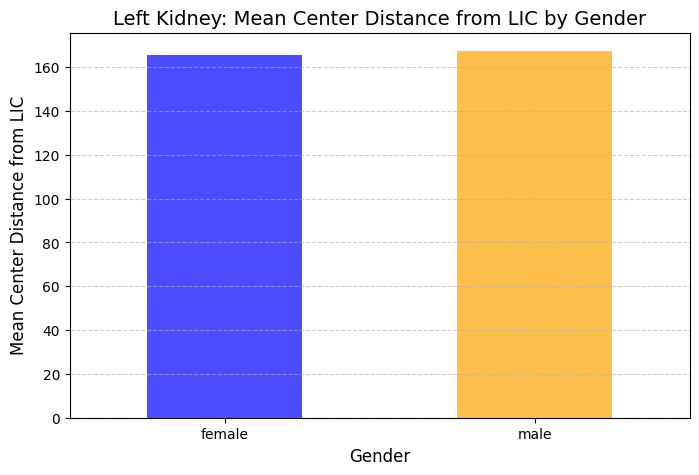

In [105]:
left_kidney = left_kidney.dropna(subset=['Gender', 'Center Distance from LIC'])

grouped_data = left_kidney.groupby('Gender')['Center Distance from LIC'].mean()

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Left Kidney: Mean Center Distance from LIC by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Center Distance from LIC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Right Centerpoint from Left Iliac Crest (Gender)

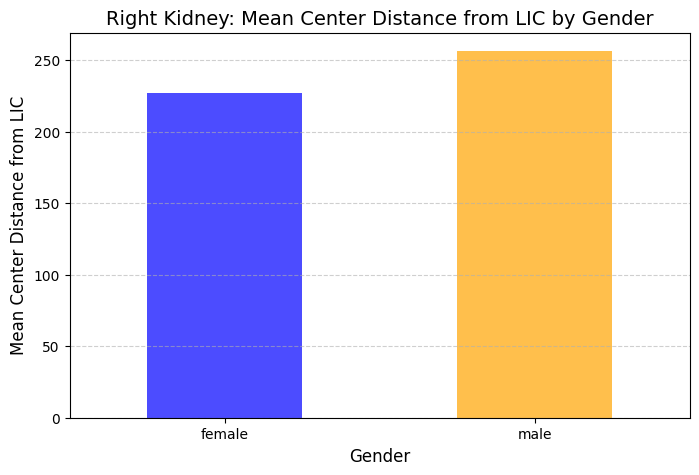

In [106]:
right_kidney = right_kidney.dropna(subset=['Gender', 'Center Distance from LIC'])

grouped_data = right_kidney.groupby('Gender')['Center Distance from LIC'].mean()

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Right Kidney: Mean Center Distance from LIC by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Center Distance from LIC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Left Centerpoint from Left Iliac Crest (BMI)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_35332/1750370208.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = left_kidney.groupby('BMI Category')['Center Distance from LIC'].mean()


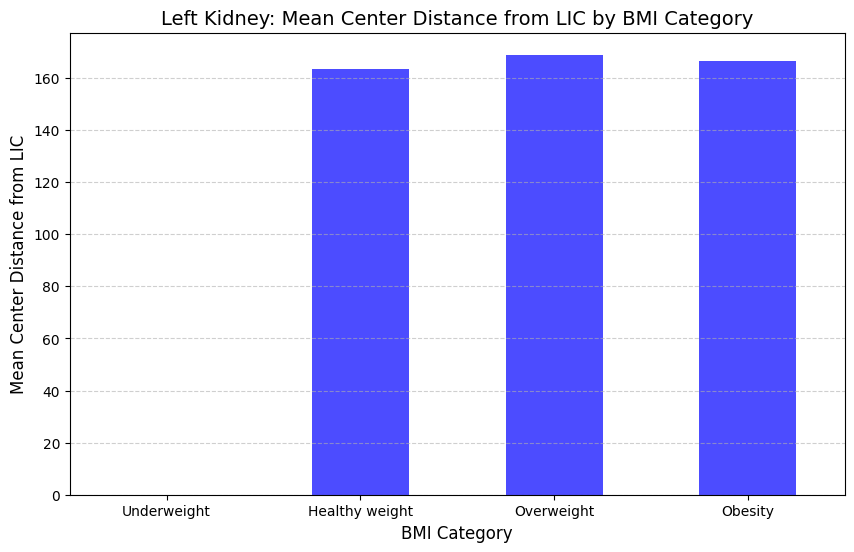

In [107]:
left_kidney = left_kidney.dropna(subset=['BMI', 'Center Distance from LIC'])

bins = [0, 18.5, 25, 30, float('inf')]  # Inf handles BMIs above 30
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']

left_kidney['BMI Category'] = pd.cut(left_kidney['BMI'], bins=bins, labels=labels, right=False)

grouped_data = left_kidney.groupby('BMI Category')['Center Distance from LIC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Left Kidney: Mean Center Distance from LIC by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Mean Center Distance from LIC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Right Centerpoint from Left Illiac Crest (BMI)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_35332/2129265498.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = right_kidney.groupby('BMI Category')['Center Distance from LIC'].mean()


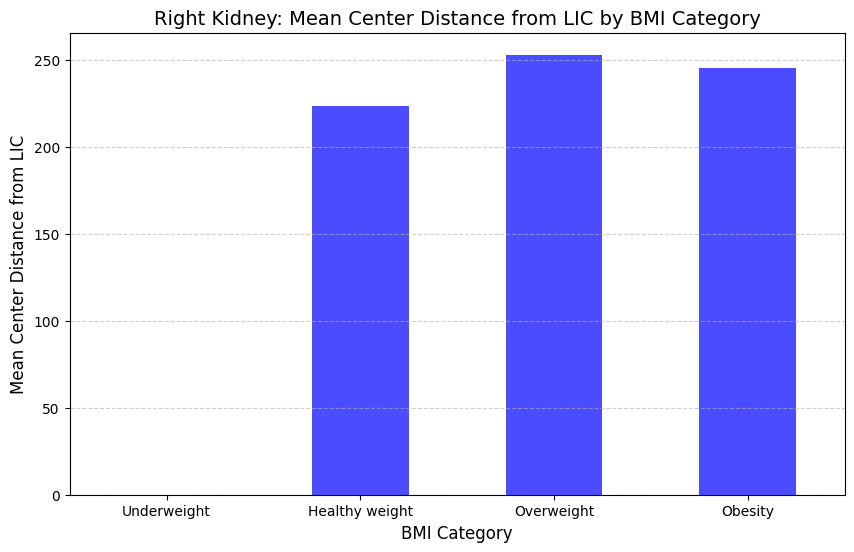

In [108]:
right_kidney = right_kidney.dropna(subset=['BMI', 'Center Distance from LIC'])

bins = [0, 18.5, 25, 30, float('inf')]  # Inf handles BMIs above 30
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']

right_kidney['BMI Category'] = pd.cut(right_kidney['BMI'], bins=bins, labels=labels, right=False)

grouped_data = right_kidney.groupby('BMI Category')['Center Distance from LIC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Right Kidney: Mean Center Distance from LIC by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Mean Center Distance from LIC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Left Iliac Crest as the Reference Point

Translate the coordinates around the new reference point (Left Iliac Crest)

In [122]:
def subtract_tuples(coord1, coord2):
    if pd.isna(coord1) or pd.isna(coord2):
        return None
    return tuple(c1 - c2 for c1, c2 in zip(coord1, coord2))

# Subtract 'Left Iliac Crest' from itself (resulting in zero vectors)
left_kidney['Left Illiac Crest'] = left_kidney['Left Illiac Crest'].apply(lambda x: subtract_tuples(x, x))

# Subtract 'Left Iliac Crest' from 'Left Center Point'
left_kidney['Left Center Point'] = left_kidney.apply(
    lambda row: subtract_tuples(row['Left Center Point'], row['Left Illiac Crest']), axis=1
)

In [123]:
left_kidney

,Case Number,Age,Gender,BMI,Torso Length,Torso Width,Left Illiac Crest,Right Illiac Crest,Xyphoid Process,Left Center Point,LR,PA,IS,Center Distance from LIC,Age Group,BMI Category
0,case_00000,49,male,29.47,266.9510,137.430,"(0.0, 0.0, 0.0)","(132.939, 23.984, -116.837)","(-2.211, 53.167, 152.5)","(-65.897, -78.243, 52.806)",78.17,62.93,112.21,196.066227,30-50,Overweight
1,case_00001,50,male,33.71,262.6500,254.099,"(0.0, 0.0, 0.0)","(132.939, 16.92, -129.552)","(5.686, 126.479, 131.952)","(-121.16, 8.642, -131.844)",86.19,91.49,117.34,0.000000,50-70,Obesity
2,case_00002,74,male,28.13,245.6135,143.556,"(0.0, 0.0, 0.0)","(132.939, -38.321, -81.048)","(0.127, 120.438, 183.137)","(-57.666, -98.83, 66.496)",86.19,85.84,114.51,130.245339,70+,Overweight
6,case_00006,69,male,24.42,312.1270,148.366,"(0.0, 0.0, 0.0)","(132.939, 40.988, -94.09)","(-10.406, 109.699, 221.092)","(-75.244, -49.697, 78.646)",77.48,72.90,107.65,193.492770,50-70,Healthy weight
9,case_00009,73,female,22.90,234.2040,127.017,"(0.0, 0.0, 0.0)","(141.253, 5.623, -113.115)","(10.856, 58.678, 121.378)","(-47.076, -47.341, 3.716)",73.15,72.73,109.78,143.585944,70+,Healthy weight
10,case_00010,71,female,33.13,239.6385,124.698,"(0.0, 0.0, 0.0)","(141.253, -17.201, -118.549)","(19.55, 80.415, 121.378)","(-60.985, -39.126, -21.193)",66.49,86.96,105.74,118.350702,70+,Obesity
11,case_00011,65,female,31.47,229.1115,129.496,"(0.0, 0.0, 0.0)","(141.253, 18.257, -31.014)","(0.315, 83.564, 192.292)","(-78.045, -19.002, 87.303)",83.57,92.71,120.12,149.731831,50-70,Obesity
12,case_00012,62,female,30.92,242.0550,116.552,"(0.0, 0.0, 0.0)","(117.527, 36.747, -53.203)","(13.256, 88.956, 192.292)","(-63.869, -19.002, 86.071)",79.87,92.71,117.66,156.294953,50-70,Obesity
13,case_00013,83,female,22.86,225.5080,114.101,"(0.0, 0.0, 0.0)","(121.449, 15.178, -88.497)","(5.413, 70.768, 138.49)","(-60.437, -44.002, 31.659)",68.14,72.13,102.94,155.259241,70+,Healthy weight
14,case_00014,67,female,29.43,261.4530,123.240,"(0.0, 0.0, 0.0)","(121.449, 22.489, -64.127)","(5.413, 93.919, 201.851)","(-73.841, -34.254, 95.629)",68.14,72.13,109.04,177.358465,50-70,Overweight
